In [2]:
import sys
sys.path.append('..')

from kandinsky3 import get_T2I_pipeline


libgomp: Invalid value for environment variable OMP_NUM_THREADS


In [6]:
t2i_pipe = get_T2I_pipeline('cuda:0', fp16=True)

In [11]:
res = t2i_pipe("A cute corgi lives in a house made out of sushi.")

100%|██████████| 50/50 [00:05<00:00,  8.62it/s]


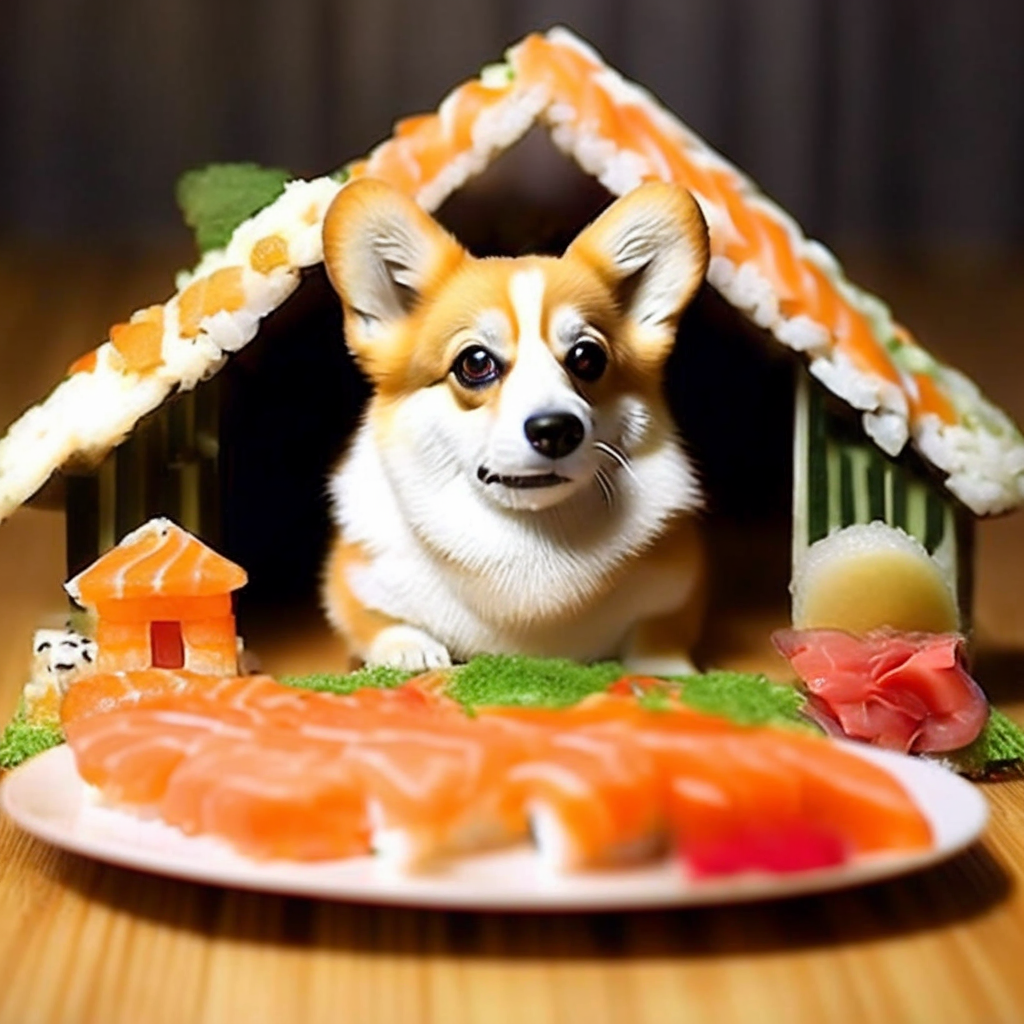

In [12]:
res[0]